C:\Users\Aru\AppData\Local\Temp\ipykernel_12240\2771209482.py:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Country', y='Prevalence Rate (%)_mean',
C:\Users\Aru\AppData\Local\Temp\ipykernel_12240\2771209482.py:71: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Country', y='Mortality Rate (%)_mean',
C:\Users\Aru\AppData\Local\Temp\ipykernel_12240\2771209482.py:99: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Country', y='Value', data=prevalence_melt, order=order,
C:\Users\Aru\AppData\Local\Temp\ipykernel_12240\277120948

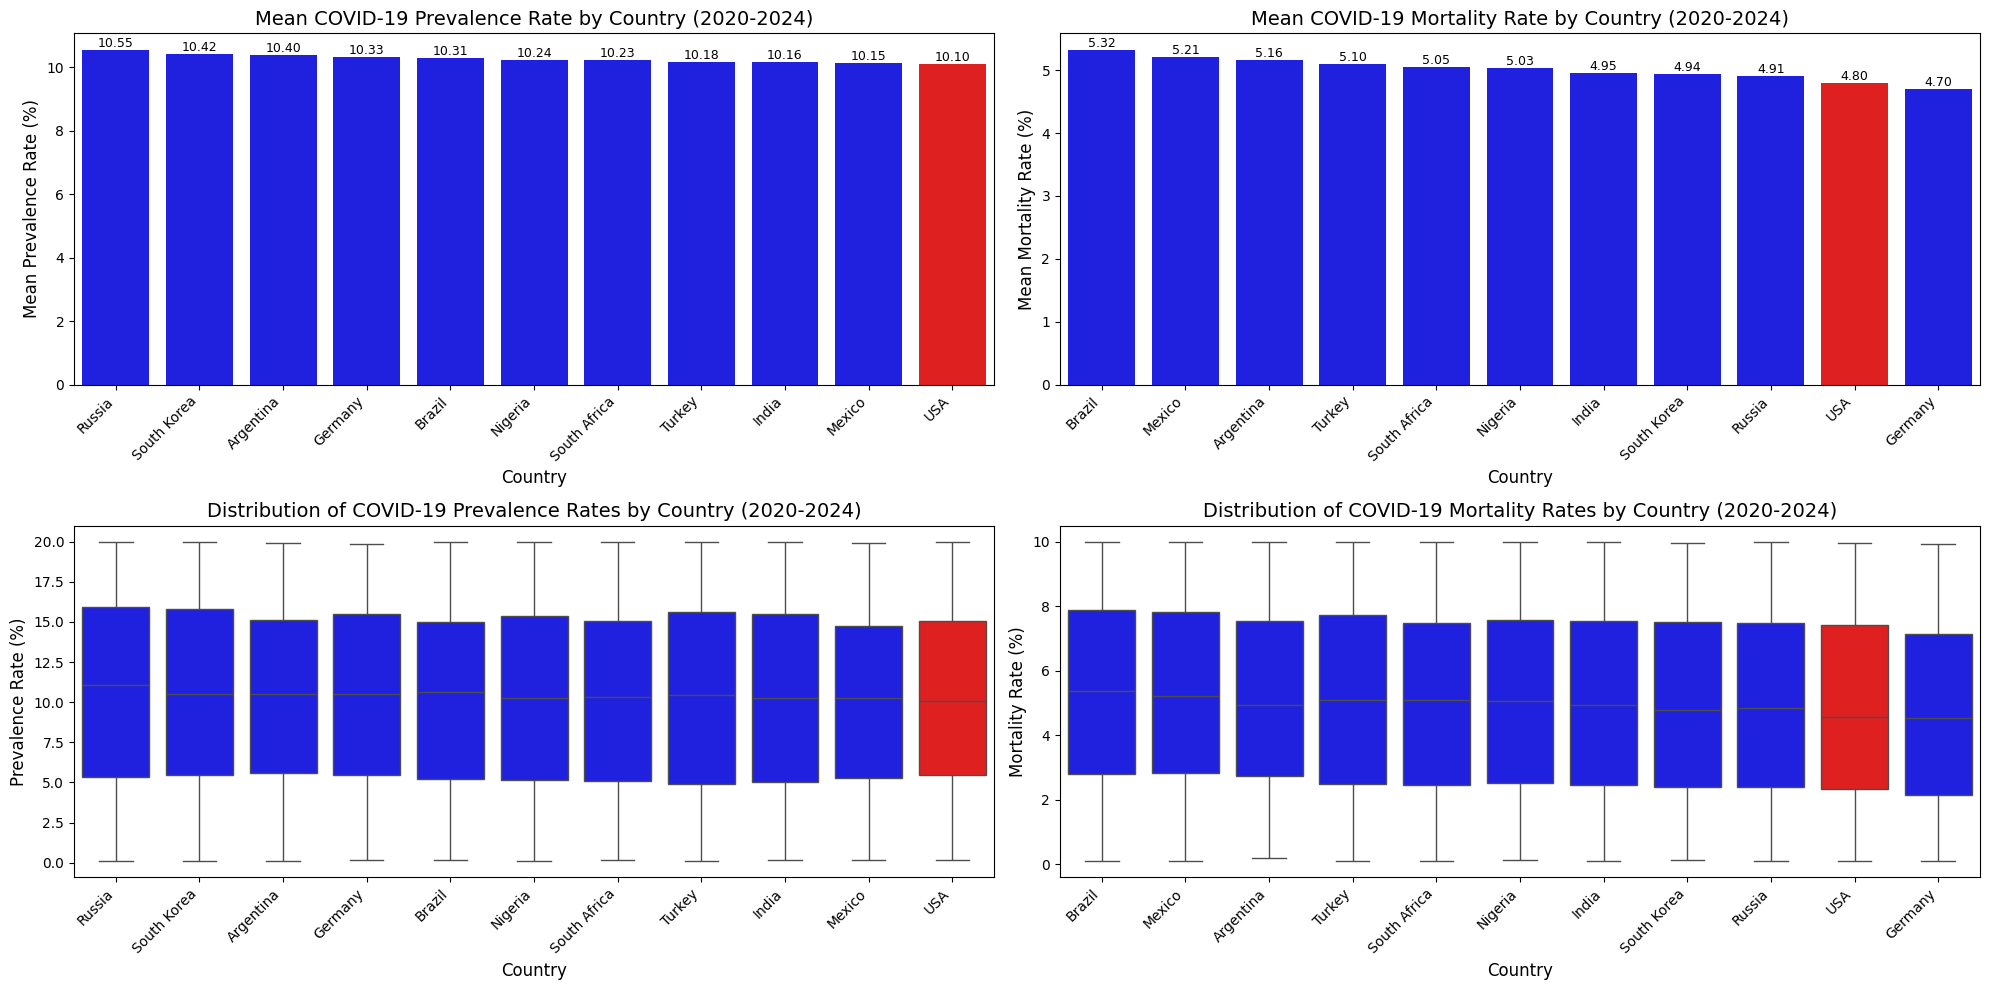

STATISTICAL COMPARISON: USA vs. Selected Countries

COVID-19 PREVALENCE RATE (%)
     Country  Mean  Median  Std Dev  Min   Max
      Russia 10.55   11.05     5.98 0.10 19.97
 South Korea 10.42   10.53     5.76 0.10 19.98
   Argentina 10.40   10.51     5.69 0.13 19.89
     Germany 10.33   10.48     5.77 0.15 19.86
      Brazil 10.31   10.62     5.72 0.15 19.98
     Nigeria 10.24   10.24     5.87 0.12 19.96
South Africa 10.23   10.35     5.79 0.19 19.98
      Turkey 10.18   10.44     5.91 0.11 19.97
       India 10.16   10.25     5.65 0.17 19.95
      Mexico 10.15   10.28     5.62 0.16 19.90
         USA 10.10   10.08     5.59 0.14 19.99

COVID-19 MORTALITY RATE (%)
     Country  Mean  Median  Std Dev  Min   Max
      Brazil  5.32    5.36     2.87 0.11  9.98
      Mexico  5.21    5.23     2.90 0.11  9.99
   Argentina  5.16    4.95     2.78 0.20 10.00
      Turkey  5.10    5.09     2.95 0.11  9.98
South Africa  5.05    5.10     2.92 0.10 10.00
     Nigeria  5.03    5.06     2.90 0.13  9.

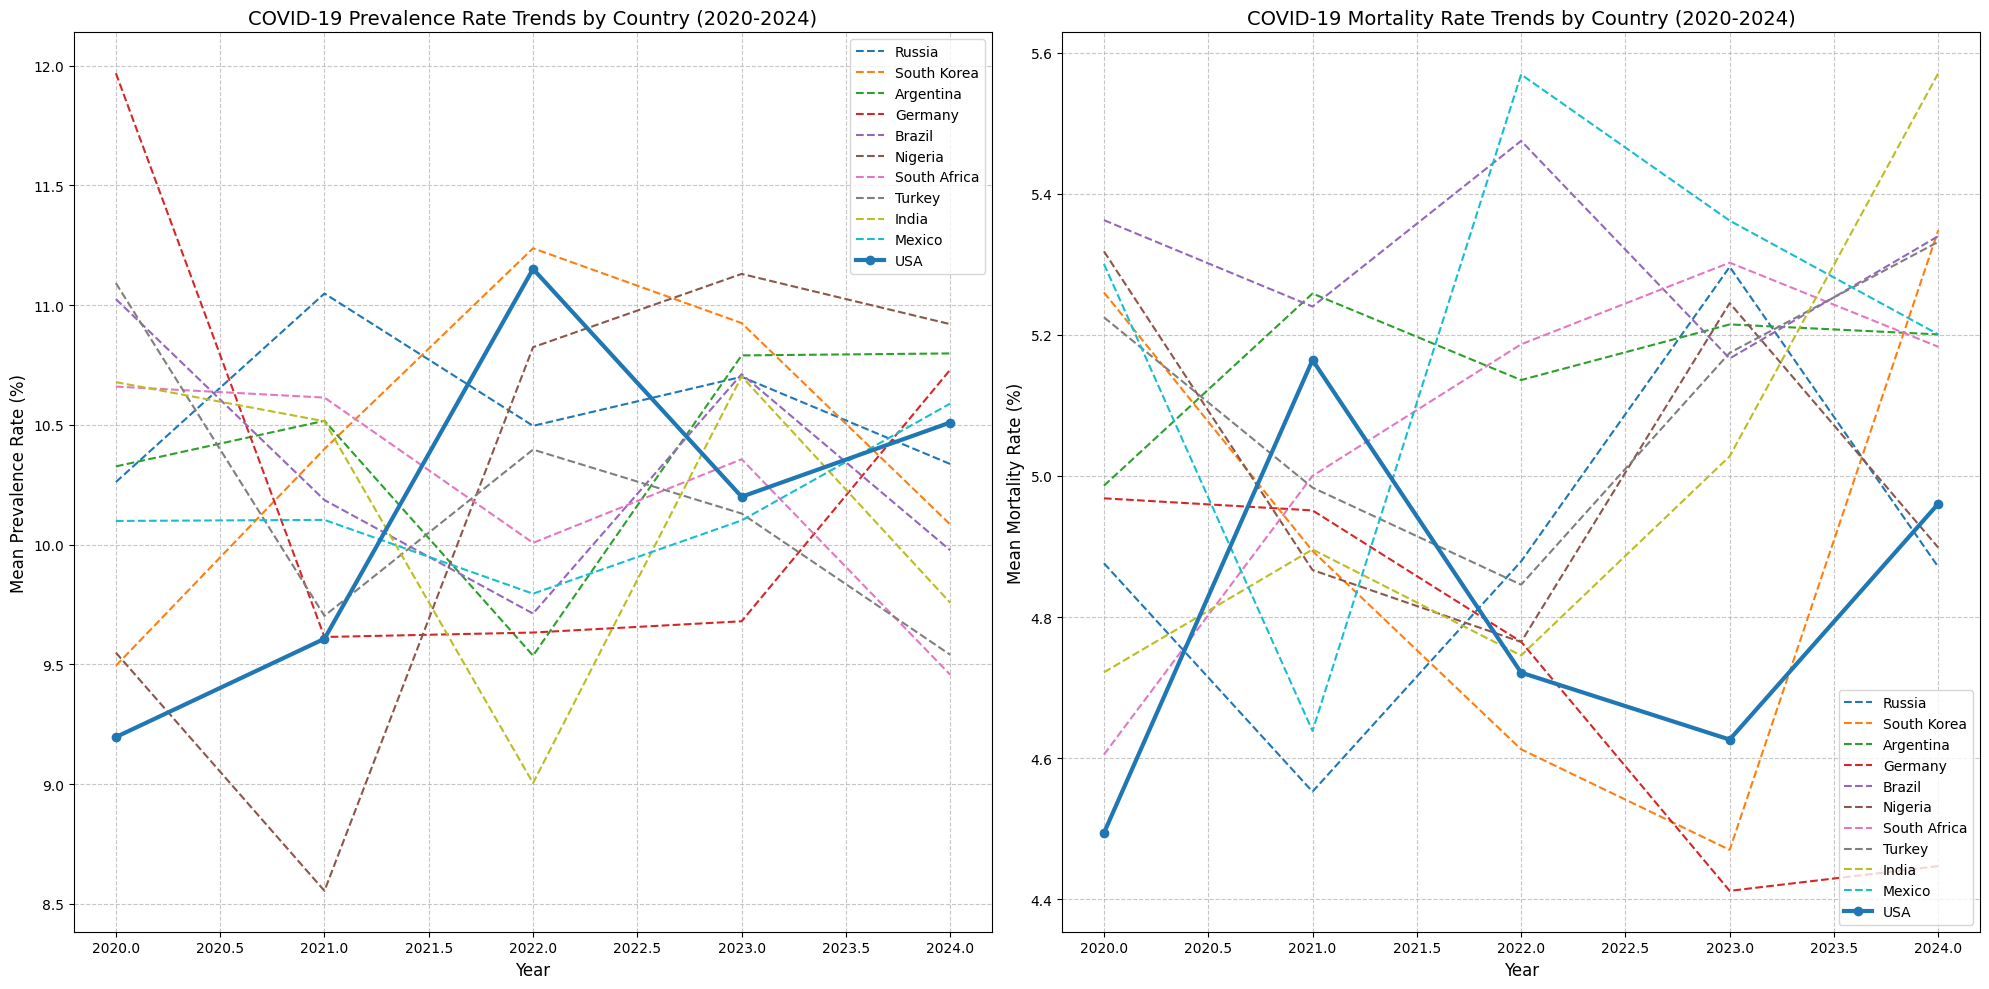


HYPOTHESIS TESTING: USA vs. Each Country (α = 0.05)

PREVALENCE RATE T-TEST RESULTS:
     Country  P-value Significant           Comparison
      Russia   0.2113          No Other Country Higher
 South Korea   0.3447          No Other Country Higher
   Argentina   0.3840          No Other Country Higher
     Germany   0.5137          No Other Country Higher
      Brazil   0.5619          No Other Country Higher
     Nigeria   0.6834          No Other Country Higher
South Africa   0.7153          No Other Country Higher
      Turkey   0.8119          No Other Country Higher
       India   0.8562          No Other Country Higher
      Mexico   0.8882          No Other Country Higher

MORTALITY RATE T-TEST RESULTS:
     Country  P-value Significant           Comparison
      Brazil   0.0050         Yes Other Country Higher
      Mexico   0.0244         Yes Other Country Higher
   Argentina   0.0430         Yes Other Country Higher
      Turkey   0.1077          No Other Country Higher
So

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
GHS=pd.read_csv(r'C:\Users\Aru\Downloads\archive\Global Health Statistics.csv')

filtered_data = GHS[(GHS['Year'] >= 2020) & (GHS['Year'] <= 2024)]

covid_data = GHS[(GHS['Year'] >= 2020) & 
                (GHS['Year'] <= 2024) & 
                (GHS['Disease Name'] == 'COVID-19')]

# First, filter the data using the correct dataframe name 'GHS'
filtered_data = GHS[(GHS['Year'] >= 2020) & 
                  (GHS['Year'] <= 2024) & 
                  (GHS['Disease Name'] == 'COVID-19')]

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# First, filter the data using GHS dataframe
filtered_data = GHS[(GHS['Year'] >= 2020) & 
                  (GHS['Year'] <= 2024) & 
                  (GHS['Disease Name'] == 'COVID-19')]

# List of countries to compare with USA
comparison_countries = ['Russia', 'South Korea', 'Argentina', 'Germany', 
                         'Brazil', 'Nigeria', 'South Africa', 'Turkey', 
                         'India', 'Mexico', 'USA']

# Filter data to include only the specified countries
country_data = filtered_data[filtered_data['Country'].isin(comparison_countries)]

# Calculate statistics by country
country_stats = country_data.groupby('Country').agg({
    'Prevalence Rate (%)': ['mean', 'median', 'std', 'min', 'max'],
    'Mortality Rate (%)': ['mean', 'median', 'std', 'min', 'max']
})

# Flatten the multi-index columns
country_stats.columns = ['_'.join(col).strip() for col in country_stats.columns.values]
country_stats = country_stats.reset_index()

# Sort countries by mean prevalence rate for the bar chart
sorted_prevalence = country_stats.sort_values('Prevalence Rate (%)_mean', ascending=False)

# Create visualizations
plt.figure(figsize=(20, 10))

# Bar chart comparing mean prevalence rates
plt.subplot(2, 2, 1)
ax = sns.barplot(x='Country', y='Prevalence Rate (%)_mean', 
              data=sorted_prevalence,
              palette=['red' if x == 'USA' else 'blue' for x in sorted_prevalence['Country']])
plt.title('Mean COVID-19 Prevalence Rate by Country (2020-2024)', fontsize=14)
plt.ylabel('Mean Prevalence Rate (%)', fontsize=12)
plt.xlabel('Country', fontsize=12)
plt.xticks(rotation=45, ha='right')
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', fontsize=9)

# Sort countries by mean mortality rate for the bar chart
sorted_mortality = country_stats.sort_values('Mortality Rate (%)_mean', ascending=False)

# Bar chart comparing mean mortality rates
plt.subplot(2, 2, 2)
ax = sns.barplot(x='Country', y='Mortality Rate (%)_mean', 
              data=sorted_mortality,
              palette=['red' if x == 'USA' else 'blue' for x in sorted_mortality['Country']])
plt.title('Mean COVID-19 Mortality Rate by Country (2020-2024)', fontsize=14)
plt.ylabel('Mean Mortality Rate (%)', fontsize=12)
plt.xlabel('Country', fontsize=12)
plt.xticks(rotation=45, ha='right')
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', fontsize=9)

# Prepare data for box plots
prevalence_melt = pd.melt(country_data, 
                         id_vars=['Country'], 
                         value_vars=['Prevalence Rate (%)'],
                         var_name='Metric', 
                         value_name='Value')

mortality_melt = pd.melt(country_data, 
                        id_vars=['Country'], 
                        value_vars=['Mortality Rate (%)'],
                        var_name='Metric', 
                        value_name='Value')

# Box plot for prevalence rate distribution
plt.subplot(2, 2, 3)
order = sorted_prevalence['Country'].tolist()
sns.boxplot(x='Country', y='Value', data=prevalence_melt, order=order,
           palette=['red' if x == 'USA' else 'blue' for x in order])
plt.title('Distribution of COVID-19 Prevalence Rates by Country (2020-2024)', fontsize=14)
plt.ylabel('Prevalence Rate (%)', fontsize=12)
plt.xlabel('Country', fontsize=12)
plt.xticks(rotation=45, ha='right')

# Box plot for mortality rate distribution
plt.subplot(2, 2, 4)
order = sorted_mortality['Country'].tolist()
sns.boxplot(x='Country', y='Value', data=mortality_melt, order=order,
           palette=['red' if x == 'USA' else 'blue' for x in order])
plt.title('Distribution of COVID-19 Mortality Rates by Country (2020-2024)', fontsize=14)
plt.ylabel('Mortality Rate (%)', fontsize=12)
plt.xlabel('Country', fontsize=12)
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

# Create statistical summary table for prevalence rate
print("STATISTICAL COMPARISON: USA vs. Selected Countries\n")
print("COVID-19 PREVALENCE RATE (%)")
prevalence_stats = country_stats[['Country', 
                                 'Prevalence Rate (%)_mean', 
                                 'Prevalence Rate (%)_median',
                                 'Prevalence Rate (%)_std',
                                 'Prevalence Rate (%)_min',
                                 'Prevalence Rate (%)_max']]
prevalence_stats = prevalence_stats.sort_values('Prevalence Rate (%)_mean', ascending=False)
prevalence_stats.columns = ['Country', 'Mean', 'Median', 'Std Dev', 'Min', 'Max']
print(prevalence_stats.to_string(index=False, float_format=lambda x: f"{x:.2f}"))

# Create statistical summary table for mortality rate
print("\nCOVID-19 MORTALITY RATE (%)")
mortality_stats = country_stats[['Country', 
                                'Mortality Rate (%)_mean', 
                                'Mortality Rate (%)_median',
                                'Mortality Rate (%)_std',
                                'Mortality Rate (%)_min',
                                'Mortality Rate (%)_max']]
mortality_stats = mortality_stats.sort_values('Mortality Rate (%)_mean', ascending=False)
mortality_stats.columns = ['Country', 'Mean', 'Median', 'Std Dev', 'Min', 'Max']
print(mortality_stats.to_string(index=False, float_format=lambda x: f"{x:.2f}"))

# Calculate USA's rank in each metric
usa_prev_mean_rank = list(prevalence_stats['Country']).index('USA') + 1
usa_mort_mean_rank = list(mortality_stats['Country']).index('USA') + 1

print(f"\nUSA RANKINGS AMONG THE {len(comparison_countries)} SELECTED COUNTRIES:")
print(f"Prevalence Rate (Mean): #{usa_prev_mean_rank}")
print(f"Mortality Rate (Mean): #{usa_mort_mean_rank}")

# Create year-by-year trend comparison between USA and other countries
yearly_country_stats = country_data.groupby(['Year', 'Country']).agg({
    'Prevalence Rate (%)': 'mean',
    'Mortality Rate (%)': 'mean'
}).reset_index()

# Plot trends
plt.figure(figsize=(20, 10))

# Plot prevalence rate trends
plt.subplot(1, 2, 1)
for country in comparison_countries:
    country_trend = yearly_country_stats[yearly_country_stats['Country'] == country]
    linestyle = '-' if country == 'USA' else '--'
    linewidth = 3 if country == 'USA' else 1.5
    plt.plot(country_trend['Year'], country_trend['Prevalence Rate (%)'], 
             label=country, linestyle=linestyle, linewidth=linewidth,
             marker='o' if country == 'USA' else None)

plt.title('COVID-19 Prevalence Rate Trends by Country (2020-2024)', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Mean Prevalence Rate (%)', fontsize=12)
plt.legend(loc='best')
plt.grid(True, linestyle='--', alpha=0.7)

# Plot mortality rate trends
plt.subplot(1, 2, 2)
for country in comparison_countries:
    country_trend = yearly_country_stats[yearly_country_stats['Country'] == country]
    linestyle = '-' if country == 'USA' else '--'
    linewidth = 3 if country == 'USA' else 1.5
    plt.plot(country_trend['Year'], country_trend['Mortality Rate (%)'], 
             label=country, linestyle=linestyle, linewidth=linewidth,
             marker='o' if country == 'USA' else None)

plt.title('COVID-19 Mortality Rate Trends by Country (2020-2024)', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Mean Mortality Rate (%)', fontsize=12)
plt.legend(loc='best')
plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

# Statistical hypothesis testing: Compare USA with each country
from scipy import stats

# Initialize lists to store test results
t_test_results_prevalence = []
t_test_results_mortality = []

# Get USA data
usa_prevalence = country_data[country_data['Country'] == 'USA']['Prevalence Rate (%)']
usa_mortality = country_data[country_data['Country'] == 'USA']['Mortality Rate (%)']

# Loop through each country and perform t-tests
for country in sorted(comparison_countries):
    if country != 'USA':
        # Get country data
        country_prevalence = country_data[country_data['Country'] == country]['Prevalence Rate (%)']
        country_mortality = country_data[country_data['Country'] == country]['Mortality Rate (%)']
        
        # T-test for prevalence rates
        t_stat_prev, p_value_prev = stats.ttest_ind(usa_prevalence, country_prevalence, equal_var=False)
        
        # T-test for mortality rates
        t_stat_mort, p_value_mort = stats.ttest_ind(usa_mortality, country_mortality, equal_var=False)
        
        # Determine if difference is significant
        prev_significant = "Yes" if p_value_prev < 0.05 else "No"
        mort_significant = "Yes" if p_value_mort < 0.05 else "No"
        
        # Determine which is higher
        prev_comparison = "USA Higher" if t_stat_prev > 0 else "Other Country Higher"
        mort_comparison = "USA Higher" if t_stat_mort > 0 else "Other Country Higher"
        
        # Store results
        t_test_results_prevalence.append({
            'Country': country,
            'P-value': p_value_prev,
            'Significant': prev_significant,
            'Comparison': prev_comparison
        })
        
        t_test_results_mortality.append({
            'Country': country,
            'P-value': p_value_mort,
            'Significant': mort_significant,
            'Comparison': mort_comparison
        })

# Convert to dataframes
t_test_df_prevalence = pd.DataFrame(t_test_results_prevalence)
t_test_df_mortality = pd.DataFrame(t_test_results_mortality)

# Print hypothesis test results
print("\nHYPOTHESIS TESTING: USA vs. Each Country (α = 0.05)")
print("\nPREVALENCE RATE T-TEST RESULTS:")
print(t_test_df_prevalence.sort_values('P-value').to_string(index=False, float_format=lambda x: f"{x:.4f}"))

print("\nMORTALITY RATE T-TEST RESULTS:")
print(t_test_df_mortality.sort_values('P-value').to_string(index=False, float_format=lambda x: f"{x:.4f}"))

Data from the 'Global Health Statistics' csv data set was extracted to include data from years 2020-2024. From this, COVID 19 data was extracted to include prevalence and mortality rates. The United States was then used as a reference variable to compare median and mean COVID prevalence and mortality rates of different countries. Trends in median and mean rates vary across the timeline in regards to countries. The dataset shows that the United States has one of the lowest (if not the lowest) prevalence and mortality rates amongst this dataset. However, this data set contains and oversampling of developing countries. Whilst prevelance rates did not differ significantly, mortality rates did. In fact the only countries which had higher mortality rates than the US, were Mexico, Argentina, and Brazil. 

The interpretation could be as follows: an oversampling of developing countries has shown that developing countries had no significant difference in prevelance rates in reference to the US. Mortality rates were only significant amongst developing countries which included Mexico, Argentina, and Brazil. 
For developing countries to have no difference in recorded* COVID 19 prevalence and death rates, raises concern for the capability of pandemic preparation. 